In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
from LookGenerator.datasets.utils import prepare_image_for_model_transpose, to_array_from_model_bin_transpose
import LookGenerator.datasets.transforms as custom_transforms

In [3]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\train\image2\00000_00.jpg")
img_to_model = prepare_image_for_model_transpose(image)

In [4]:
transform_output = transforms.Compose([
    transforms.Resize((192, 256)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1)

In [5]:
model = load_model(model,
                       r"C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session22\unet_epoch_199_6.139310116233932e-05.pt")
modelled = model(img_to_model)

torch.Size([1, 1, 192, 256])
torch.Size([1, 3, 192, 256])


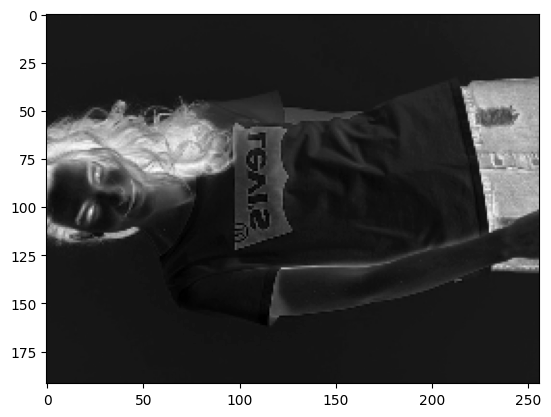

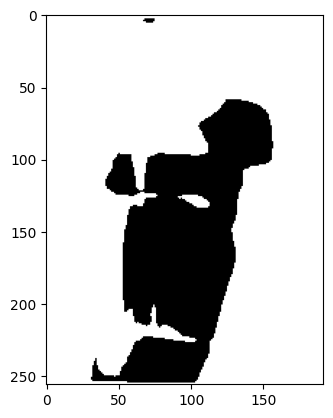

In [6]:
print(modelled.shape)
print(img_to_model.shape)
plt.imshow(img_to_model.detach().numpy()[0,0,:,:], cmap = 'binary')
plt.show()
modelled_img = to_array_from_model_bin_transpose(transform_output(modelled.detach()))

plt.imshow(modelled_img,cmap = 'binary')
plt.show()

In [4]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session20\2'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_to_model)

    seg = to_array_from_model_bin_transpose(transform_output(seg.detach()))
    plt.imshow(seg, cmap = 'grey')
    plt.show()

NameError: name 'os' is not defined

In [36]:
list_files

['unet_epoch_0_0.0004146995936827221.pt',
 'unet_epoch_10_0.00013559024805313822.pt',
 'unet_epoch_11_0.0001363196216377635.pt',
 'unet_epoch_1_0.0002299497680693186.pt',
 'unet_epoch_2_0.00019595566830549476.pt',
 'unet_epoch_3_0.0002449564916001321.pt',
 'unet_epoch_4_0.00015042741122639293.pt',
 'unet_epoch_5_0.00013543147476519738.pt',
 'unet_epoch_6_0.0001545024621101852.pt',
 'unet_epoch_7_0.0001113592537013435.pt',
 'unet_epoch_8_9.441707502215434e-05.pt',
 'unet_epoch_9_0.0001528911620109777.pt']